In [30]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models.model import TransMUNet
import os
from PIL import Image
import torch
from torchvision import transforms

In [31]:
# Kiểm tra thiết bị
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print("Using device:", device)

Using device: cuda


In [32]:
%cd "/home/ngocson/WorkSpace/Datn/project/"

/home/ngocson/WorkSpace/Datn/project


In [33]:
weights_path = 'checkpoints/weights_deepcrack.model'

In [34]:
model = TransMUNet(n_classes=1)
checkpoints = torch.load(weights_path, map_location="cpu")
model.load_state_dict(checkpoints['model_weights'], strict=True)


<All keys matched successfully>

In [35]:
from PIL import Image
import torch
from torchvision import transforms
channel_means = [0.598, 0.584, 0.565]
channel_stds  = [0.104, 0.103, 0.103]
def load_sample(image_path, mask_path, image_size=(256, 256)):
    transform_img = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize(channel_means, channel_stds)
    ])
    transform_mask = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
    ])
    image = transform_img(Image.open(image_path).convert('RGB'))
    mask = transform_mask(Image.open(mask_path).convert('L'))
    return image.unsqueeze(0), mask.unsqueeze(0)

In [36]:
image_path = "data/DeepCrack/Testdataset/test_img/11171.jpg"
mask_path = "data/DeepCrack/Testdataset/test_lab/11171.png"

In [37]:
image, mask = load_sample(image_path, mask_path)

In [ ]:
with torch.no_grad():
    pred_mask = model(image)
    pred_mask = torch.sigmoid(pred_mask).squeeze(0).cpu().numpy()

In [39]:
image1 = Image.open(image_path).convert('RGB')
image1 = image1.resize((256, 256))

<function matplotlib.pyplot.show(close=None, block=None)>

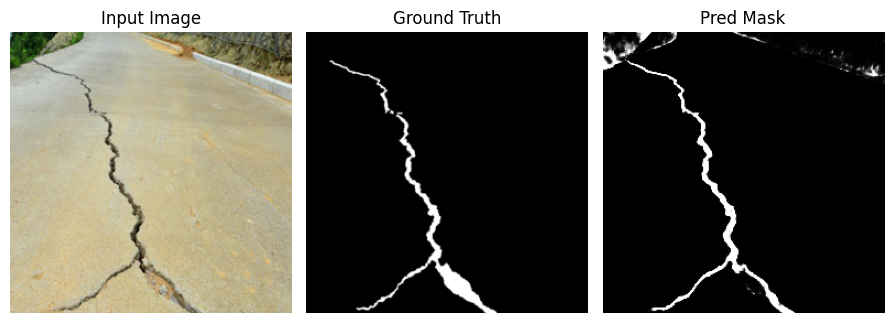

In [40]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Input Image")
plt.imshow(image1)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Ground Truth")
plt.imshow(mask[0, 0].cpu(), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Pred Mask")
plt.imshow(pred_mask[0], cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show

In [131]:
%cd "/home/ngocson/WorkSpace/Datn/project/"

/home/ngocson/WorkSpace/Datn/project


In [140]:
image_path2 = "data/DeepCrack/Testdataset/test_img/11129.jpg"
mask_path2 = "data/DeepCrack/Testdataset/test_lab/11129.png"

In [141]:
image2, mask2 = load_sample(image_path2, mask_path2)

In [142]:
with torch.no_grad():
    pred_mask2 = model(image2)
    pred_mask2 = torch.sigmoid(pred_mask2).squeeze(0).cpu().numpy()
    #pred_boundary = torch.sigmoid(pred_boundary).squeeze(0).cpu().numpy()

In [145]:
image2 = Image.open(image_path2).convert('RGB')
image2 = image2.resize((256, 256))

<function matplotlib.pyplot.show(close=None, block=None)>

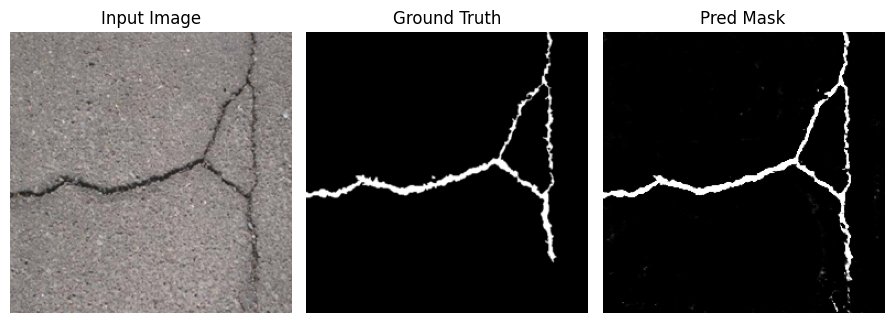

In [146]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Input Image")
plt.imshow(image2)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Ground Truth")
plt.imshow(mask2[0, 0].cpu(), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Pred Mask")
plt.imshow(pred_mask2[0], cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show

In [152]:
new_image_path = "/home/ngocson/WorkSpace/Datn/data/Train/img/11_Trim_007414.jpg"
new_mask_path = "/home/ngocson/WorkSpace/Datn/data/Train/mask/11_Trim_007414.png"

In [153]:
new_image, new_mask = load_sample(new_image_path, new_mask_path)

In [154]:
with torch.no_grad():
    pred_new_mask= model(new_image)
    pred_new_mask = torch.sigmoid(pred_new_mask).squeeze(0).cpu().numpy()

In [155]:
new_image = Image.open(new_image_path).convert('RGB')
new_image = new_image.resize((256, 256))

<function matplotlib.pyplot.show(close=None, block=None)>

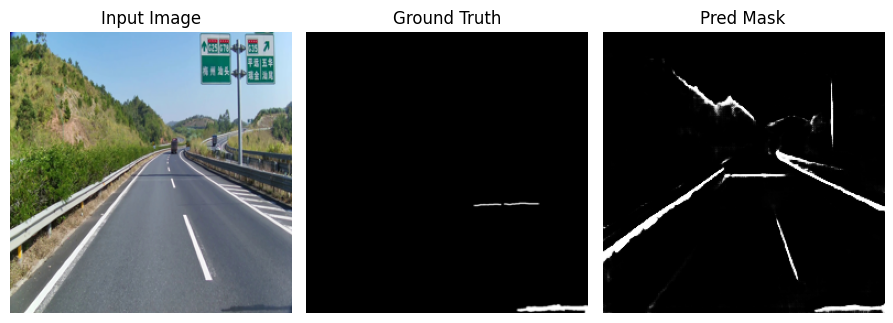

In [156]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Input Image")
plt.imshow(new_image)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Ground Truth")
plt.imshow(new_mask[0, 0].cpu(), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Pred Mask")
plt.imshow(pred_new_mask[0], cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show

In [1]:
! python3 crop_data.py

>>> Đã lưu 15 patch chứa vết nứt từ DJI_0203_001212.
>>> Đã lưu 5 patch chứa vết nứt từ DJI_0202_005654.
>>> Đã lưu 3 patch chứa vết nứt từ DJI_0212_001926.
>>> Đã lưu 12 patch chứa vết nứt từ DJI_0206_002144.
>>> Đã lưu 14 patch chứa vết nứt từ DJI_0212_005099.
>>> Đã lưu 7 patch chứa vết nứt từ DJI_0204_004369.
>>> Đã lưu 8 patch chứa vết nứt từ DJI_0202_009565.
>>> Đã lưu 6 patch chứa vết nứt từ DJI_0198_004929.
>>> Đã lưu 12 patch chứa vết nứt từ DJI_0216_002775.
>>> Đã lưu 9 patch chứa vết nứt từ 11_Trim_007666.
>>> Đã lưu 3 patch chứa vết nứt từ DJI_0202_003375.
>>> Đã lưu 8 patch chứa vết nứt từ DJI_0218_007984.
>>> Đã lưu 1 patch chứa vết nứt từ DJI_0206_005570.
>>> Đã lưu 13 patch chứa vết nứt từ DJI_0203_007109.
>>> Đã lưu 21 patch chứa vết nứt từ DJI_0216_008012.
>>> Đã lưu 7 patch chứa vết nứt từ DJI_0199_005824.
>>> Đã lưu 9 patch chứa vết nứt từ DJI_0206_003716.
>>> Đã lưu 15 patch chứa vết nứt từ 11_Trim_001744.
>>> Đã lưu 6 patch chứa vết nứt từ DJI_0212_003320.
>>> Đã 

In [2]:
! python3 crop_data.py

>>> Đã lưu 6 patch chứa vết nứt từ 11_Trim_006580.
>>> Đã lưu 9 patch chứa vết nứt từ 11_Trim_002171.
>>> Đã lưu 11 patch chứa vết nứt từ 11_Trim_007675.
>>> Đã lưu 17 patch chứa vết nứt từ DJI_0214_000849.
>>> Đã lưu 16 patch chứa vết nứt từ DJI_0204_005124.
>>> Đã lưu 13 patch chứa vết nứt từ 11_Trim_003321.
>>> Đã lưu 3 patch chứa vết nứt từ 11_Trim_002555.
>>> Đã lưu 17 patch chứa vết nứt từ 202210281429_004743.
>>> Đã lưu 3 patch chứa vết nứt từ 11_Trim_006015.
>>> Đã lưu 17 patch chứa vết nứt từ 202210281429_004931.
>>> Đã lưu 19 patch chứa vết nứt từ 11_Trim_003694.
>>> Đã lưu 23 patch chứa vết nứt từ 202210281429_007368.
>>> Đã lưu 16 patch chứa vết nứt từ 11_Trim_007208.
>>> Đã lưu 12 patch chứa vết nứt từ 13_Trim_000926.
>>> Đã lưu 17 patch chứa vết nứt từ 202210281429_006684.
>>> Đã lưu 9 patch chứa vết nứt từ DJI_0199_003445.
>>> Đã lưu 16 patch chứa vết nứt từ DJI_0214_000720.
>>> Đã lưu 21 patch chứa vết nứt từ 13_Trim_001304.
>>> Đã lưu 5 patch chứa vết nứt từ 11_Trim_00

In [21]:
import os
import shutil

# Đường dẫn đến folder gốc chứa dữ liệu
source_dir = 'data/Val/patches/masks'  # thay bằng đường dẫn thật
# Đường dẫn đến folder đích
destination_dir = 'data/Val/patches/new_masks'  # thay bằng đường dẫn thật

# Tạo folder đích nếu chưa có
os.makedirs(destination_dir, exist_ok=True)

# Lấy danh sách file và sắp xếp (nếu cần theo thứ tự tên)
files = sorted(os.listdir(source_dir))

# Lấy 600 file đầu tiên
for filename in files[:600]:
    source_path = os.path.join(source_dir, filename)
    dest_path = os.path.join(destination_dir, filename)
    shutil.copy2(source_path, dest_path)

In [6]:
import torch
import torch.nn as nn
import torch.nn.functional as F
from models.model import TransMUNet
import os
from PIL import Image
import torch
from torchvision import transforms

In [10]:
from models.TransMUCustomNet import TransMUCustomNet

In [7]:
%cd "/home/ngocson/WorkSpace/Datn/project/"

/home/ngocson/WorkSpace/Datn/project


In [8]:
new_weights_path = 'checkpoints/new/weights_deepcrack.model'

In [12]:
new_model = TransMUCustomNet(n_classes=1)
checkpoints = torch.load(new_weights_path, map_location="cpu")
new_model.load_state_dict(checkpoints['model_weights'], strict=True)

<All keys matched successfully>

In [13]:
channel_means = [0.598, 0.584, 0.565]
channel_stds  = [0.104, 0.103, 0.103]
def load_sample(image_path, mask_path, image_size=(256, 256)):
    transform_img = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
        transforms.Normalize(channel_means, channel_stds)
    ])
    transform_mask = transforms.Compose([
        transforms.Resize(image_size),
        transforms.ToTensor(),
    ])
    image = transform_img(Image.open(image_path).convert('RGB'))
    mask = transform_mask(Image.open(mask_path).convert('L'))
    return image.unsqueeze(0), mask.unsqueeze(0)

In [20]:
image_path = "data/Train/patches/images/11_Trim_001744_1280_256.jpg"
mask_path = "data/Train/patches/masks/11_Trim_001744_1280_256.png"

In [21]:
image, mask = load_sample(image_path, mask_path)

In [26]:
with torch.no_grad():
    pred_mask = new_model(image)
    pred_mask = torch.sigmoid(pred_mask).squeeze(0).cpu().numpy()

In [27]:
image1 = Image.open(image_path).convert('RGB')
image1 = image1.resize((256, 256))

<function matplotlib.pyplot.show(close=None, block=None)>

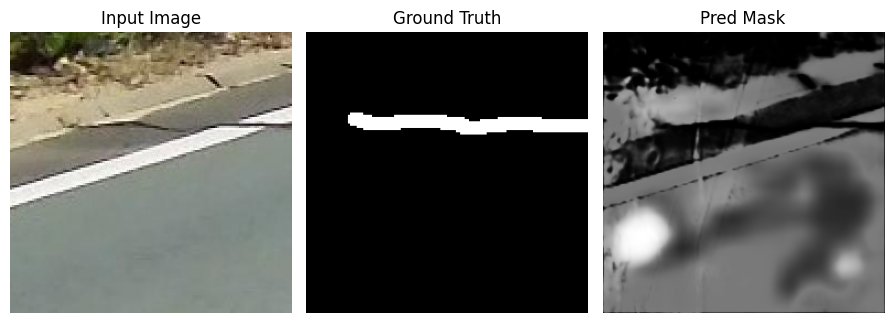

In [28]:
import matplotlib.pyplot as plt

plt.figure(figsize=(12, 4))

plt.subplot(1, 4, 1)
plt.title("Input Image")
plt.imshow(image1)
plt.axis("off")

plt.subplot(1, 4, 2)
plt.title("Ground Truth")
plt.imshow(mask[0, 0].cpu(), cmap='gray')
plt.axis("off")

plt.subplot(1, 4, 3)
plt.title("Pred Mask")
plt.imshow(pred_mask[0], cmap='gray')
plt.axis("off")

plt.tight_layout()
plt.show

In [ ]:
import os
import random
import shutil

# Đường dẫn gốc
src_image_dir = 'data/Val/patches/images'
src_mask_dir = 'data/Val/patches/masks'

# Đường dẫn nơi lưu 3000 ảnh
dst_image_dir = 'data/Val/val_dataset_500/images'
dst_mask_dir = 'data/Val/val_dataset_500/masks'

os.makedirs(dst_image_dir, exist_ok=True)
os.makedirs(dst_mask_dir, exist_ok=True)

# Lấy tất cả ảnh gốc (ví dụ .jpg)
all_images = [f for f in os.listdir(src_image_dir) if f.endswith('.jpg')]
assert len(all_images) >= 500, "Không đủ ảnh để lấy 3000 mẫu!"

# Lấy ngẫu nhiên 3000 ảnh
random.seed(42)
sampled_images = random.sample(all_images, 500)

# Copy ảnh và mask tương ứng
for img_name in sampled_images:
    mask_name = img_name.replace('.jpg', '.png')  # Nếu mask là .png cùng tên

    shutil.copy(os.path.join(src_image_dir, img_name), os.path.join(dst_image_dir, img_name))
    shutil.copy(os.path.join(src_mask_dir, mask_name), os.path.join(dst_mask_dir, mask_name))
